In [3]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests

import warnings

# Desabilitar todos os warnings
warnings.filterwarnings("ignore")

importacao = pd.read_csv('Dados/Dados_Embrapa/Importacao/Tbl_ImpVinhos.csv', sep=';', encoding='utf-8')
importacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,0,0,0,0,2510,8761,0,0,8,161
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


In [4]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção: {importacao.shape[0]}")
print(f"Colunas da tabela Produção: {importacao.shape[1]}")


colum_ness = importacao.shape[1] - 30 # Verificar o número de colunas trazidas dado a separação entre quantidade e valor
print(f"Colunas da tabela Produção: {colum_ness}")

Linhas da tabela Produção: 68
Colunas da tabela Produção: 110
Colunas da tabela Produção: 80


In [5]:
# Pegando apenas as colunas impares que são referentes ao valor importado
importacao_valor = importacao.iloc[:, 1::2]
# corringindo o nome das colunas
importacao_valor.columns = importacao_valor.columns.str[:-2]
importacao_valor.head()

,Pa,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa do Sul,0.0,0,0,0,0,0,0,0,0,...,3033932,2996543,1686226,3241298,3574371,3604038,1701072,2508140,2266827,1732850
1,Alemanha,30498.0,26027,92103,98638,202502,149931,171308,201840,668631,...,483316,358275,606333,315959,516975,412794,504168,546967,438595,557947
2,Argélia,0.0,0,0,0,0,0,0,0,0,...,0,0,43,0,0,0,0,0,0,0
3,Arábia Saudita,0.0,0,0,0,0,0,0,0,0,...,0,0,43,0,3249,0,0,8761,0,161
4,Argentina,12260.0,15022,58137,76121,167473,90855,277507,395615,709813,...,53815956,48043201,45214862,51770842,52817642,54527380,66322932,79527959,87519642,83918138


In [6]:
importacao_qtd = importacao.iloc[:, ::2]
importacao_qtd.head()

,Id,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,0,0,0,0,0,0,0,0,0,...,722715,743335,578829,1138732,1127053,1092042,627150,859169,738116,522733
1,2,52297,34606,134438,111523,219173,134354,168134,160926,437831,...,115804,95171,158386,83289,142971,101055,136992,106541,92600,102456
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,563,0,0,2510,0,8
4,5,19525,24942,104906,116887,215930,145823,348653,408399,614134,...,13437321,12465041,14098009,15461740,15221318,16548931,22610267,26869241,27980574,25276991


In [7]:
importacao_final_valor = pd.concat([importacao_valor.iloc[:, :1], importacao_valor.iloc[:, -15:]], axis=1)
importacao_final_valor.head(10)
importacao_final_valor = importacao_final_valor.rename(columns={'Pa': 'País'})

importacao_qtd = pd.concat([importacao.iloc[:, :2], importacao_qtd.iloc[:, -15:]], axis=1)
importacao_qtd.head(10)

importacao_final_valor.head(5)


,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa do Sul,1931449,3600658,2136394,3041449,1985184,3033932,2996543,1686226,3241298,3574371,3604038,1701072,2508140,2266827,1732850
1,Alemanha,291876,784674,933545,591167,414070,483316,358275,606333,315959,516975,412794,504168,546967,438595,557947
2,Argélia,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0
3,Arábia Saudita,0,0,0,0,0,0,0,43,0,3249,0,0,8761,0,161
4,Argentina,38521731,52126581,58806736,55633562,49524694,53815956,48043201,45214862,51770842,52817642,54527380,66322932,79527959,87519642,83918138


In [8]:
importacao_qtd.head(5)

,Id,País,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,Africa do Sul,493093,966276,507509,722327,475331,722715,743335,578829,1138732,1127053,1092042,627150,859169,738116,522733
1,2,Alemanha,56075,192661,198025,113243,114866,115804,95171,158386,83289,142971,101055,136992,106541,92600,102456
2,3,Argélia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0,0,0,0,0,0,0,0,563,0,0,2510,0,8
4,5,Argentina,13902750,16965266,16673491,14613839,12732815,13437321,12465041,14098009,15461740,15221318,16548931,22610267,26869241,27980574,25276991


In [9]:
# Melt 
importacao_melt_valor = pd.melt(
    importacao_final_valor,
    id_vars=['País'],
    value_vars= importacao_final_valor.iloc[:,-15:],
    var_name='Ano',
    value_name='Valor(US$)',
)

importacao_melt_qtd = pd.melt(
    importacao_qtd,
    id_vars=['País'],
    value_vars= importacao_qtd.iloc[:,-15:],
    var_name='Ano',
    value_name='Quantidade',
)


In [10]:
importacao_melt_qtd.head()

,País,Ano,Quantidade
0,Africa do Sul,2009,493093
1,Alemanha,2009,56075
2,Argélia,2009,0
3,Arábia Saudita,2009,0
4,Argentina,2009,13902750


In [11]:
importacao_melt_valor.head()

,País,Ano,Valor(US$)
0,Africa do Sul,2009,1931449
1,Alemanha,2009,291876
2,Argélia,2009,0
3,Arábia Saudita,2009,0
4,Argentina,2009,38521731


In [12]:
#unindo as tabelas de quantidade importada e valor importado
importacao = pd.merge(importacao_melt_qtd,importacao_melt_valor,on =['País','Ano'])
importacao.head()

,País,Ano,Quantidade,Valor(US$)
0,Africa do Sul,2009,493093,1931449
1,Alemanha,2009,56075,291876
2,Argélia,2009,0,0
3,Arábia Saudita,2009,0,0
4,Argentina,2009,13902750,38521731


In [13]:
importacao = importacao.set_index('País')

In [14]:
import yfinance as yf
import pandas as pd
# Baixar dados do USD-BRL
dolar_yahoo = yf.download("USDBRL=X", start="2009-01-01")['Close']

# Converter para DataFrame
dolar_yahoo = dolar_yahoo.reset_index()
dolar_yahoo.columns = ['data', 'cotacao']

# Converter 'data' para datetime e extrair o ano
dolar_yahoo['data'] = pd.to_datetime(dolar_yahoo['data'])
dolar_yahoo['ano'] = dolar_yahoo['data'].dt.year

# Calcular média anual
media_anual = dolar_yahoo.groupby('ano')['cotacao'].mean().reset_index()

# Saída formatada
media_anual.columns = ['Ano', 'Cotação Média (USD-BRL)']

media_anual.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Ano,Cotação Média (USD-BRL)
0,2009,1.988851
1,2010,1.754732
2,2011,1.669180
3,2012,1.952577
4,2013,2.154575


In [15]:
importacao['Ano'] = importacao['Ano'].astype(int)

In [16]:
dados_finais = pd.merge(importacao, media_anual, on='Ano', how='left')
dados_finais.head()

,Ano,Quantidade,Valor(US$),Cotação Média (USD-BRL)
0,2009,493093,1931449,1.988851
1,2009,56075,291876,1.988851
2,2009,0,0,1.988851
3,2009,0,0,1.988851
4,2009,13902750,38521731,1.988851


In [17]:
dados_agrupados = dados_finais.groupby('Ano').agg({
    'Quantidade': 'sum',
    'Valor(US$)': 'sum',
    'Cotação Média (USD-BRL)': 'mean'
}).reset_index()


<Figure size 1400x800 with 0 Axes>

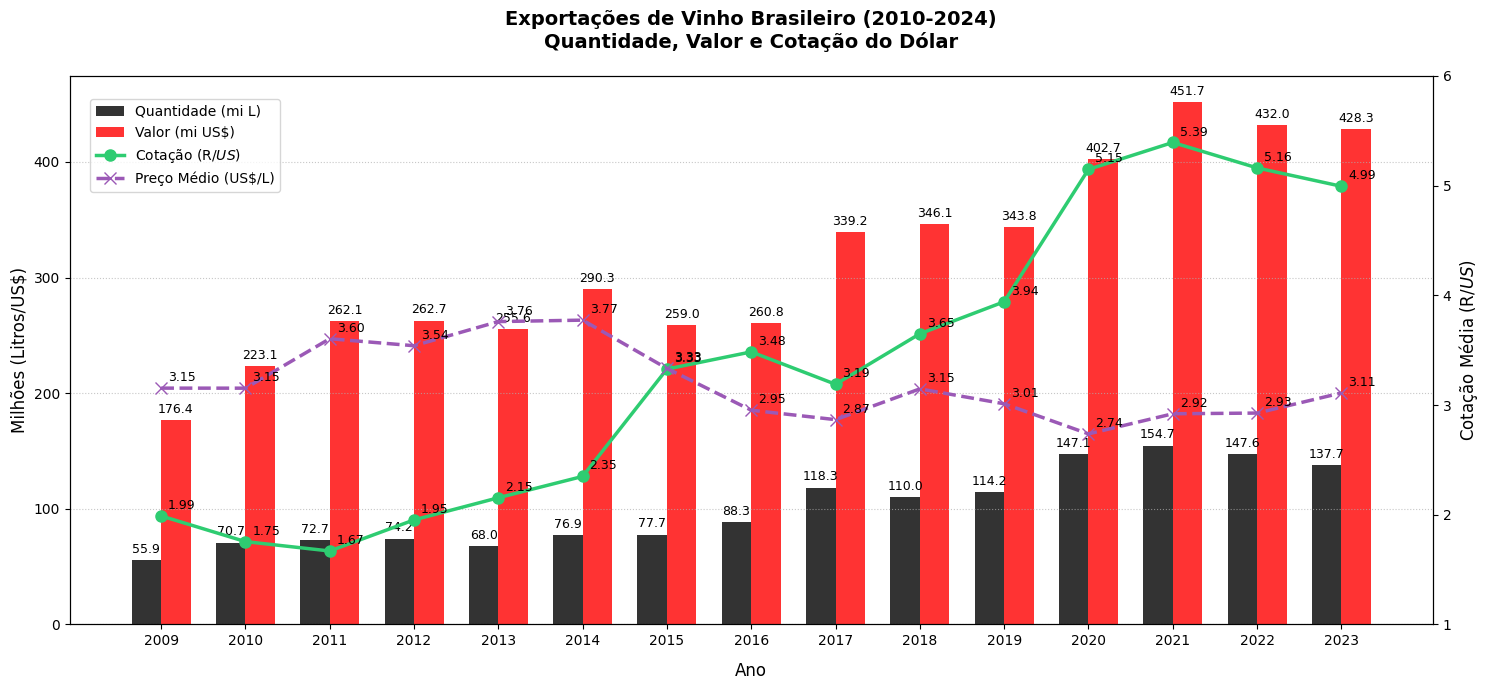

In [ ]:

dados = dados_agrupados
dados['Quantidade em litros'] = dados['Quantidade']  # Convertendo kg para litros (1 kg = 1 L para vinho)
dados['Valor em US$'] = dados['Valor(US$)']  # Valor já está em US$     
dados['Cotação Média (USD-BRL)'] = dados['Cotação Média (USD-BRL)']  # Cotação média do dólar
# Configurações do estilo

plt.figure(figsize=(14, 8))

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(15, 7))

# Converter para milhões
dados['Quant (mi L)'] = dados['Quantidade em litros'] / 1e6
dados['Valor (mi US$)'] = dados['Valor em US$'] / 1e6
dados['Preço Médio (US$/L)'] = dados['Valor (mi US$)'] / dados['Quant (mi L)']

# Gráfico de barras agrupadas
width = 0.35  # Largura das barras
x = dados['Ano']

bar1 = ax1.bar(x - width/2, dados['Quant (mi L)'], width, 
               color="#000000", alpha=0.8, label='Quantidade (mi L)')
bar2 = ax1.bar(x + width/2, dados['Valor (mi US$)'], width, 
               color="#ff0000", alpha=0.8, label='Valor (mi US$)')

# Configurações do eixo primário
ax1.set_xlabel('Ano', fontsize=12, labelpad=10)
ax1.set_ylabel('Milhões (Litros/US$)', fontsize=12)
ax1.set_xticks(x)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.grid(axis='y', linestyle=':', alpha=0.7)

# Eixo secundário para cotação
ax2 = ax1.twinx()
line = ax2.plot(x, dados['Cotação Média (USD-BRL)'], 
                color='#2ecc71', marker='o', linewidth=2.5, 
                markersize=8, label='Cotação (R$/US$)')

line2 = ax2.plot(x, dados['Preço Médio (US$/L)'],
                color='#9b59b6', linestyle='--', marker='x', 
                linewidth=2.5, markersize=8, label='Preço Médio (US$/L)')

# Configurações do eixo secundário
ax2.set_ylabel('Cotação Média (R$/US$)', fontsize=12)
ax2.set_ylim(1, 6)
ax2.grid(visible=False)

# Adicionar valores nas barras (apenas para valores relevantes)
for rect in bar1 + bar2:
    height = rect.get_height()
    if height > 0:  # Só mostra label se o valor for > 0
        ax1.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

# Adicionar valores na linha de cotação
for i, txt in enumerate(dados['Cotação Média (USD-BRL)']):
    ax2.annotate(f'{txt:.2f}', 
                 (x[i], dados['Cotação Média (USD-BRL)'][i]), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='left',
                 fontsize=9)
    
for i, txt in enumerate(dados['Preço Médio (US$/L)']):
    ax2.annotate(f'{txt:.2f}', 
                 (x[i], dados['Preço Médio (US$/L)'][i]), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='left',
                 fontsize=9)

# Título e legendas
plt.title('Exportações de Vinho Brasileiro (2010-2024)\nQuantidade, Valor e Cotação do Dólar', 
          fontsize=14, pad=20, fontweight='bold')

# Unir legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', 
           bbox_to_anchor=(0.01, 0.97),
           frameon=True)

# Ajustar layout
plt.tight_layout()
plt.show()

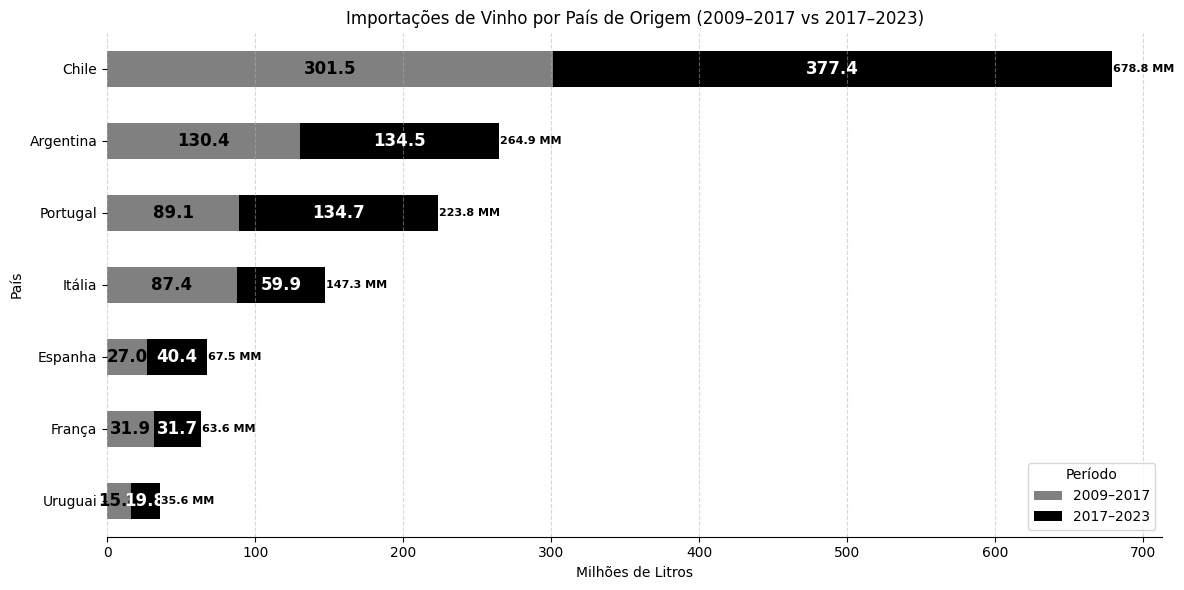

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Criar coluna de período com indexação booleana vetorizada
importacao["Período"] = np.where(importacao["Ano"] <= 2017, "2009–2017", "2017–2023")

# Agrupar por país e período
tabela = importacao.groupby(["País", "Período"])["Quantidade"].sum().unstack(fill_value=0)

# Selecionar top 7 países com maior volume total
totais = tabela.sum(axis=1)
tabela = tabela.loc[totais.nlargest(7).index]

# Ordenar do maior para o menor e inverter para maior no topo
ordem = tabela.sum(axis=1).sort_values(ascending=False).index[::-1]
tabela = tabela.loc[ordem]

# Converter para milhões
tabela_milhoes = tabela / 1_000_000

# Plotar gráfico
ax = tabela_milhoes.plot(kind="barh", stacked=True, figsize=(12, 6), color=["gray", "black"])

# Coordenadas dos centros para os rótulos internos
centros = tabela_milhoes.cumsum(axis=1) - tabela_milhoes / 2

# Expandir coordenadas em arrays vetorizados
x_coords = centros.to_numpy().flatten()
y_coords = np.repeat(np.arange(len(centros)), centros.shape[1])
labels = tabela_milhoes.to_numpy().flatten()

# Criar máscara de rótulos visíveis (> 0)
mask = labels > 0
x_coords_visible = x_coords[mask]
y_coords_visible = y_coords[mask]
labels_visible = np.round(labels[mask], 1).astype(str)

# Determinar cores (segunda coluna recebe branco)
cor_rótulos = np.tile(np.array(["black", "white"]), len(tabela))[:len(labels)]
cor_rótulos_visíveis = cor_rótulos[mask]

# Adicionar rótulos internos vetorizadamente
for i in range(len(labels_visible)):
    ax.annotate(labels_visible[i], (x_coords_visible[i], y_coords_visible[i]),
                ha='center', va='center', fontsize=12, fontweight='bold', color=cor_rótulos_visíveis[i])

# Rótulo total final
totais_finais = tabela_milhoes.sum(axis=1).to_numpy()
x_totais = totais_finais + 0.5
y_totais = np.arange(len(totais_finais))
label_totais = np.round(totais_finais, 1).astype(str) + " MM"

# Adicionar rótulos totais vetorizadamente
for i in range(len(label_totais)):
    ax.annotate(label_totais[i], (x_totais[i], y_totais[i]),
                ha='left', va='center', fontsize=8, fontweight='bold', color='black')

# Estilo do gráfico
plt.title("Importações de Vinho por País de Origem (2009–2017 vs 2017–2023)")
plt.xlabel("Milhões de Litros")
plt.ylabel("País")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='x', visible=False)
plt.grid(axis='y', visible=False)
plt.grid(axis='x', linestyle= '--', alpha=0.5,visible=False)
plt.tight_layout()
plt.show()

In [27]:
#Estatisticas

quantidade_total = dados_finais['Quantidade'].sum()/ 1000000 # Convertendo para milhões de litros
print(f"Quantidade total exportada de vinho pelo Brasil: {quantidade_total:.2f} litros")
valor_total = dados_finais['Valor(US$)'].sum() / 1000000  # Convertendo para milhões de dólares
print(f"Valor total exportado de vinho pelo Brasil: {valor_total:.2f} US$")

dados_finais.head()


Quantidade total exportada de vinho pelo Brasil: 1514.09 litros
Valor total exportado de vinho pelo Brasil: 4733.75 US$


,Ano,Quantidade,Valor(US$),Cotação Média (USD-BRL),Período
0,2009,493093,1931449,1.988851,2009–2017
1,2009,56075,291876,1.988851,2009–2017
2,2009,0,0,1.988851,2009–2017
3,2009,0,0,1.988851,2009–2017
4,2009,13902750,38521731,1.988851,2009–2017


In [29]:
# 
importacao['Ano'] = importacao['Ano'].astype(int)
importacao["Período"] = np.where(importacao["Ano"] <= 2017, "2009–2017", "2018–2023")
# 4. Calcular o volume total exportado por país e período
soma_por_pais_periodo = importacao.groupby(["Período", "País"])["Quantidade"].sum()

# 5. Transformar em tabela com países nas colunas e períodos nas linhas
tabela_volume = soma_por_pais_periodo.unstack().fillna(0)

# 6. Calcular o share (%) por país em cada período
tabela_share_percentual = tabela_volume.divide(tabela_volume.sum(axis=1), axis=0) * 100
tabela_share_percentual = tabela_share_percentual.round(2)

# 7. Identificar os Top 5 países com maior participação em cada período
top5_2009_2017 = tabela_share_percentual.loc["2009–2017"].sort_values(ascending=False).head(10).index
top5_2018_2023 = tabela_share_percentual.loc["2018–2023"].sort_values(ascending=False).head(10).index
# Obter a união dos países top 10 de ambos os períodos
top_paises = top5_2009_2017.union(top5_2018_2023)

# 8. Filtrar e transpor a tabela para ter países nas linhas e períodos nas colunas
tabela_share_ordenada = tabela_share_percentual[top_paises].T

total_geral_por_pais = tabela_volume.loc["2009–2017"] + tabela_volume.loc["2018–2023"]

# Adicionar a coluna de total geral (litros)
tabela_share_ordenada["Total (L)"] = total_geral_por_pais[tabela_share_ordenada.index]

tabela_share_ordenada.head(15)

Período,2009–2017,2018–2023,Total (L)
País,,,
Africa do Sul,0.90,0.61,11314410
Argentina,18.55,16.58,264857594
Austrália,0.59,0.20,5765459
Chile,42.89,46.52,678841769
Espanha,3.85,4.98,67463620
Estados Unidos,0.74,0.32,7803862
França,4.54,3.91,63600166
Itália,12.44,7.38,147303132
Portugal,12.68,16.60,223799606
